<h1 align=center><font size="5"> EDA and Modelling 4: Sars 2003 virus out-break analysis </font></h1>

## SARS (Severe Acute Respiratory Syndrome)

### Cause
> * SARS coronavirus (SARS-CoV) – virus identified in **2003**. 
> * SARS-CoV is thought to be an animal virus from an as-yet-uncertain animal reservoir, perhaps **bats**, that spread to other animals (**civet cats**)
> * It was first infected humans in the **Guangdong province of southern China** in **2002**.

### Transmission
> * Transmission of SARS-CoV is primarily from person to person. 
> * It appears to have occurred mainly during the second week of illness, which corresponds to the peak of virus excretion in respiratory secretions and stool, and when cases with severe disease start to deteriorate clinically. 
> * Most cases of human-to-human transmission occurred in the health care setting, in the absence of adequate infection control precautions. 
> * Implementation of appropriate infection control practices brought the global outbreak to an end.

### Symptoms
> * Influenza-like and include fever
> * Malaise
> * Myalgia
> * Headache
> * Diarrhoea, and
> * Shivering (rigors). 

### Nature of the disease
> * No individual symptom or cluster of symptoms has proved to be specific for a diagnosis of SARS. 
> * Although fever is the most frequently reported symptom, it is sometimes absent on initial measurement, especially in elderly and immunosuppressed patients.
> * Cough (initially dry), shortness of breath, and diarrhoea are present in the first and/or second week of illness. 
> * Severe cases often evolve rapidly, progressing to respiratory distress and requiring intensive care.

### Vaccines
> * None. Experimental vaccines are under development.

### Incubation period (time interval from infection with the virus to onset of symptoms)
> * Incubation period of SARS-CoV is from 2 to 7 days. 
> * A person infected with SARS-CoV cannot spread the disease until they develop symptoms.

<h1 align=center><font size="2"> Author: Shahzaib S. Warraich </font></h1>

<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#load_dataset">Loading the 2003 sars dataset</a></li>
        <li><a href="#evaluation">Graphical analysis</a></li>
         <li><a href="#evaluation">Future forecast</a></li>
       
    
</div>
<br>
<hr>

<h2 id="load_dataset">1. Loading the 2003 sars dataset</h2>


|Field name|Description|
|--- |--- |
|Date|dates of virus spread|
|Country|Affected country|
|Cumulative number of case(s)|Total positive cases till date|
|Number of deaths|total deaths on the date|
|Number recovered|total recovered till date|

In [1]:
import pandas as pd
sars=pd.read_csv("/content/sars_2003_complete_dataset_clean.csv", parse_dates=['Date'])
# rename columns
sars.columns = ['Date', 'Country', 'Cases', 'Deaths', 'Recovered']
# active no. of cases
sars['Active'] = sars['Cases'] - sars['Deaths'] - sars['Recovered']
# first few rows
sars.head(10)


,Date,Country,Cases,Deaths,Recovered,Active
0,2003-03-17,Germany,1,0,0,1
1,2003-03-17,Canada,8,2,0,6
2,2003-03-17,Singapore,20,0,0,20
3,2003-03-17,"Hong Kong SAR, China",95,1,0,94
4,2003-03-17,Switzerland,2,0,0,2
5,2003-03-17,Thailand,1,0,0,1
6,2003-03-17,Viet Nam,40,1,0,39
7,2003-03-18,Germany,2,0,0,2
8,2003-03-18,Canada,8,2,0,6
9,2003-03-18,China,0,0,0,0


In [2]:
# day wise data
day_wise = sars.groupby(['Date'])['Cases', 'Deaths', 'Recovered', 'Active'].sum()
# reset index
day_wise = day_wise.reset_index()
# first few rows
day_wise.head(10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,Date,Cases,Deaths,Recovered,Active
0,2003-03-17,167,4,0,163
1,2003-03-18,219,4,0,215
2,2003-03-19,264,9,0,255
3,2003-03-20,306,10,0,296
4,2003-03-21,350,10,0,340
5,2003-03-22,386,11,0,375
6,2003-03-24,456,17,0,439
7,2003-03-25,487,17,0,470
8,2003-03-26,1323,49,0,1274
9,2003-03-27,1408,53,0,1355


In [3]:
# importing summary dataset
latest = pd.read_csv("/content/summary_data_clean.csv")
# fix datetime columns
cols = ['Date onset first probable case', 'Date onset last probable case']
for col in cols:
    latest[col] = pd.to_datetime(latest[col])
cols = ['Number of Imported cases', 'Percentage of Imported cases']
for col in cols:
    latest[col] = latest[col].fillna(0)
# new columns
latest['Number of locally transmitted cases'] = latest['Cumulative total cases'] - latest['Number of Imported cases']
latest['Percentage of locally transmitted cases'] = 100 - latest['Percentage of Imported cases']
latest['Number of non HCW affected'] = latest['Cumulative total cases'] - latest['Number of HCW affected']
latest['Percentage of non HCW affected'] = 100 - latest['Percentage of HCW affected']
latest['Non fatality case (%)'] = 100 - latest['Case fatalities ratio (%)']
latest['No. of recovered'] = latest['Cumulative total cases'] - latest['No. of deaths']

# first few rows
latest.head()

,Country/Region,Cumulative male cases,Cumulative female cases,Cumulative total cases,No. of deaths,Case fatalities ratio (%),Date onset first probable case,Date onset last probable case,Median age,Age range,Number of Imported cases,Percentage of Imported cases,Number of HCW affected,Percentage of HCW affected,Number of locally transmitted cases,Percentage of locally transmitted cases,Number of non HCW affected,Percentage of non HCW affected,Non fatality case (%),No. of recovered
0,Australia,4,2,6,0,0,2003-02-26,2003-04-01,15.0,1-45,6.0,100.0,0,0,0.0,0.0,6,100,100,6
1,Canada,151,100,251,43,17,2003-02-23,2003-06-12,49.0,1-98,5.0,2.0,109,43,246.0,98.0,142,57,83,208
2,China,2674,2607,5327,349,7,2002-11-16,2003-06-03,NaN,NaN,0.0,0.0,1002,19,5327.0,100.0,4325,81,93,4978
3,"Hong Kong SAR, China",977,778,1755,299,17,2003-02-15,2003-05-31,40.0,0-100,0.0,0.0,386,22,1755.0,100.0,1369,78,83,1456
4,"Macao SAR, China",0,1,1,0,0,2003-05-05,2003-05-05,28.0,NaN,1.0,100.0,0,0,0.0,0.0,1,100,100,1


<h2 id="load_dataset">2. Graphical analysis</h2>

In [4]:
# numerical analysis
import numpy as np

# basic plotting
import matplotlib.pyplot as plt
# advanced plotting
import seaborn as sns
# interactive plotting
import plotly.express as px

# register the converters:
# from pandas.plotting import register_matplotlib_converters
#register_matplotlib_converters()

# plotly offline
# import plotly
# plotly.offline.init_notebook_mode(connected=True)

In [5]:
def plot_barh(col):
    
    temp_df = latest.sort_values(col, ascending=False).head(10)
    temp_df = temp_df[temp_df[col]!=0]
    
    hover_data = ['Cumulative total cases', 'No. of deaths', 'Case fatalities ratio (%)']
    
    fig =  px.bar(temp_df, x=col, y='Country/Region', orientation='h', color='Country/Region', 
                  text=col, title=col, width=700, hover_data = hover_data,
                  color_discrete_sequence = px.colors.qualitative.Dark2)
    fig.update_traces(textposition='auto')
    fig.update_layout(xaxis_title="", yaxis_title="", showlegend=False)
    fig.show()

In [6]:
def plot_pie(col1, col2, title, pal):

    temp = latest[[col1, col2]].sum()
    temp = pd.DataFrame(temp).reset_index()
    temp.columns = ['Column', 'Value']
    
    fig = px.sunburst(temp, path=['Column'], values='Value',
                      color_discrete_sequence=pal, title=title)
    fig.data[0].textinfo = 'label+text+value+percent root'
    fig.show()

In [7]:
def plot_cal(title, start, end):
    '''Plot incubation period'''
    inc_day = []
    for i in range(1, 29):
        if(i>=start and i<=end):
            inc_day.append(1)
        else:
            inc_day.append(0)
            
    inc_day = np.array(inc_day)
    inc_day = inc_day.reshape(4, 7)
    
    fig, ax = plt.subplots(figsize=(6, 3))
    ax=sns.heatmap(inc_day, linewidths=2, square=True, 
                   xticklabels='', yticklabels='', ax=ax,
                   cbar=False, cmap=['whitesmoke','royalblue'])
    ax.set_title(title, fontdict={'fontsize':16}, loc='left', pad=15)
    
    plt.show()

In [8]:
plot_barh('Cumulative total cases')

In [9]:
plot_barh('No. of deaths')

In [10]:
plot_barh('Case fatalities ratio (%)')

In [11]:
plot_barh('Number of Imported cases')

In [12]:
plot_barh('Number of HCW affected')

In [13]:
plot_pie('No. of deaths', 'No. of recovered', 'CFR', ['lightseagreen', 'orangered'])

TypeError: ignored

In [ ]:
plot_pie('Cumulative male cases', 'Cumulative female cases', 'Gender wise', ['royalblue', 'crimson'])

In [ ]:
plot_pie('Number of HCW affected', 'Number of non HCW affected', 'HCW', ['whitesmoke', 'dodgerblue'])

In [ ]:
plot_pie('Number of Imported cases', 'Number of locally transmitted cases', 'Imported cases', ['slateblue', 'gold'])

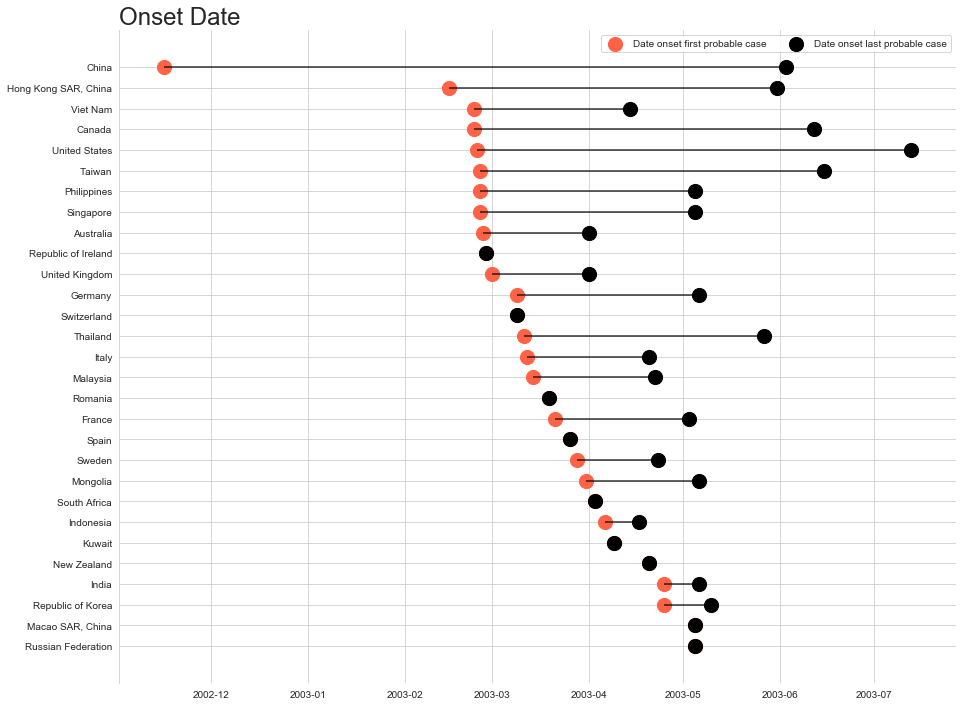

In [ ]:
latest = latest.sort_values('Date onset first probable case', ascending=False)

country = latest['Country/Region']
start = latest['Date onset first probable case'].to_numpy()
end = latest['Date onset last probable case'].to_numpy()

sns.set_style('whitegrid')
plt.figure(figsize=(15, 12))

plt.hlines(y=country, xmin=start, xmax=end, color='black', alpha=0.8)
plt.scatter(start, country, color='tomato', alpha=1, s=200, label='Date onset first probable case')
plt.scatter(end, country, color='black', alpha=1 , s=200, label='Date onset last probable case')

sns.despine(left=False, bottom=True)
plt.title('Onset Date', loc='left', fontsize=24)
plt.legend(ncol=2)
plt.show()

In [14]:
def plot_daywise(col, hue):
    temp = day_wise[day_wise['Date'] > '2003-04-12']
    fig = px.area(temp, x="Date", y=col, width=700, 
                  color_discrete_sequence=[hue])
    fig.update_layout(title=col, xaxis_title="", yaxis_title="")
    fig.show()
    
plot_daywise('Cases', 'red')

In [15]:
plot_daywise('Deaths', 'blue')

In [16]:
plot_daywise('Recovered', 'green')

In [17]:
plot_daywise('Active', 'gold')

<h2 id="load_dataset">2. Future forecast</h2

In [ ]:
from fbprophet import Prophet

In [ ]:
confirmed = sars.groupby('Date').sum()['Cases'].reset_index()
deaths = sars.groupby('Date').sum()['Deaths'].reset_index()
recovered = sars.groupby('Date').sum()['Recovered'].reset_index()
active = sars.groupby('Date').sum()['Active'].reset_index()

In [ ]:
confirmed.columns = ['ds','y']
#confirmed['ds'] = confirmed['ds'].dt.date
confirmed['ds'] = pd.to_datetime(confirmed['ds'])
confirmed.head(10)


,ds,y
0,2003-03-17,167
1,2003-03-18,219
2,2003-03-19,264
3,2003-03-20,306
4,2003-03-21,350
5,2003-03-22,386
6,2003-03-24,456
7,2003-03-25,487
8,2003-03-26,1323
9,2003-03-27,1408


In [ ]:
m = Prophet(interval_width=0.50)
m.fit(confirmed)
future = m.make_future_dataframe(periods=30)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
E:\2020v Anaconda\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



,ds
121,2003-08-06
122,2003-08-07
123,2003-08-08
124,2003-08-09
125,2003-08-10


In [ ]:
#predicting the future with date, and upper and lower limit of y value
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
121,2003-08-06,8509.457365,8163.712242,8794.144386
122,2003-08-07,8498.093527,8157.712272,8800.487725
123,2003-08-08,8496.099069,8114.606200,8820.285358
124,2003-08-09,8472.773473,8079.852845,8821.643601
125,2003-08-10,8524.622621,8084.715410,8880.495868


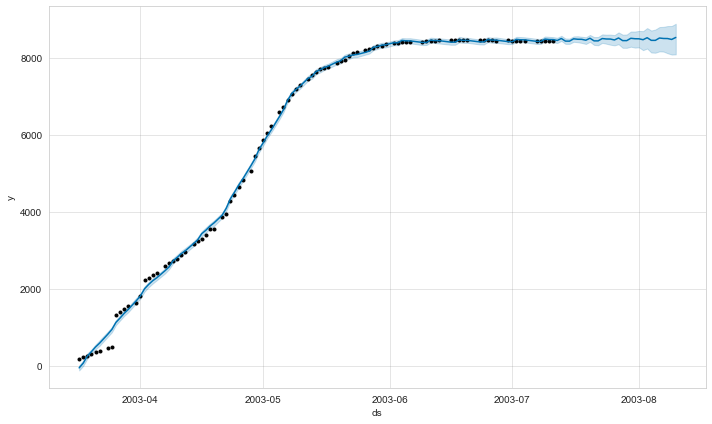

In [ ]:
confirmed_forecast_plot = m.plot(forecast)

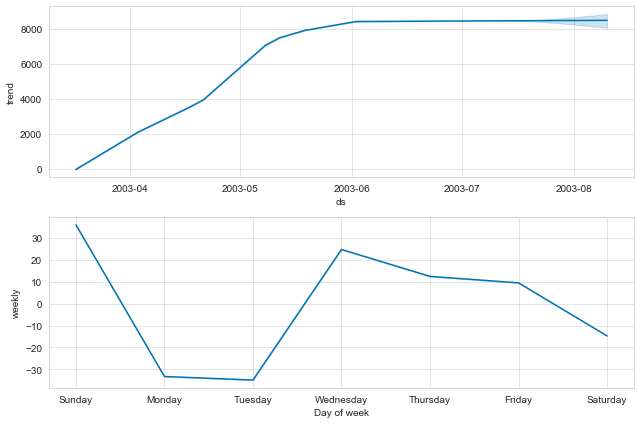

In [ ]:
confirmed_forecast_plot = m.plot_components(forecast)

In [ ]:
deaths.columns = ['ds','y']
deaths['ds'] = pd.to_datetime(deaths['ds'])
deaths.head(10)

,ds,y
0,2003-03-17,4
1,2003-03-18,4
2,2003-03-19,9
3,2003-03-20,10
4,2003-03-21,10
5,2003-03-22,11
6,2003-03-24,17
7,2003-03-25,17
8,2003-03-26,49
9,2003-03-27,53


In [ ]:
m = Prophet(interval_width=0.50)
m.fit(deaths)
future = m.make_future_dataframe(periods=30)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
E:\2020v Anaconda\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



,ds
121,2003-08-06
122,2003-08-07
123,2003-08-08
124,2003-08-09
125,2003-08-10


In [ ]:
#predicting the future with date, and upper and lower limit of y value
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
121,2003-08-06,836.986140,805.459193,874.406016
122,2003-08-07,836.741183,802.860254,876.370338
123,2003-08-08,836.510542,800.070563,878.168505
124,2003-08-09,835.059866,796.104886,879.303305
125,2003-08-10,843.071045,802.087365,890.268887


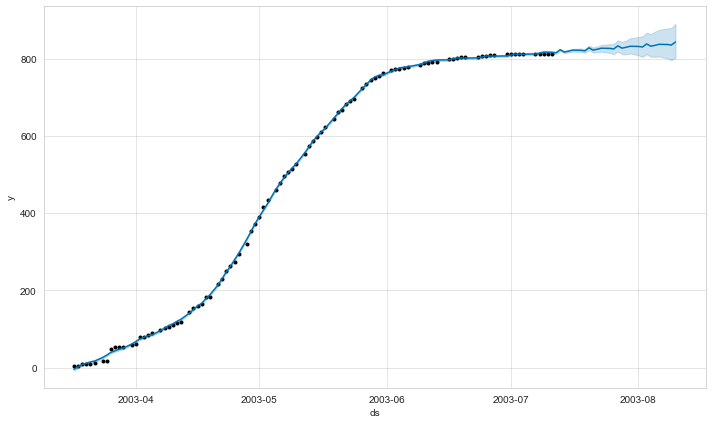

In [ ]:
deaths_forecast_plot = m.plot(forecast)

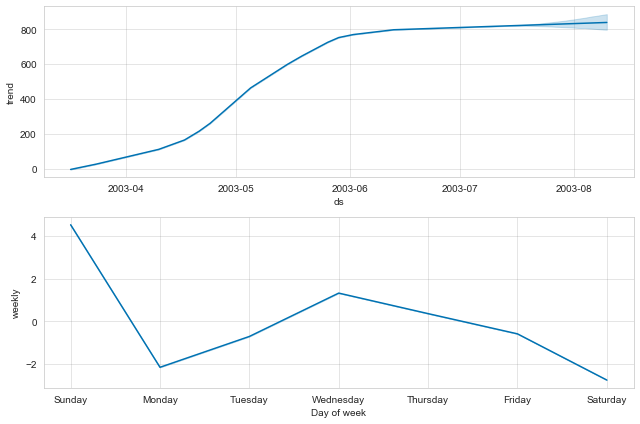

In [ ]:
deaths_forecast_plot = m.plot_components(forecast)

In [ ]:
recovered.columns = ['ds','y']
recovered['ds'] = pd.to_datetime(recovered['ds'])
recovered.head(10)

,ds,y
0,2003-03-17,0
1,2003-03-18,0
2,2003-03-19,0
3,2003-03-20,0
4,2003-03-21,0
5,2003-03-22,0
6,2003-03-24,0
7,2003-03-25,0
8,2003-03-26,0
9,2003-03-27,0


In [ ]:
m = Prophet(interval_width=0.50)
m.fit(recovered)
future = m.make_future_dataframe(periods=30)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
E:\2020v Anaconda\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



,ds
121,2003-08-06
122,2003-08-07
123,2003-08-08
124,2003-08-09
125,2003-08-10


In [ ]:
#predicting the future with date, and upper and lower limit of y value
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
121,2003-08-06,8874.087170,8657.317983,9101.813391
122,2003-08-07,8973.448879,8740.884663,9201.909810
123,2003-08-08,9006.706575,8776.082473,9233.761746
124,2003-08-09,9014.238850,8783.789049,9239.987438
125,2003-08-10,9742.692372,9496.366897,10006.708051


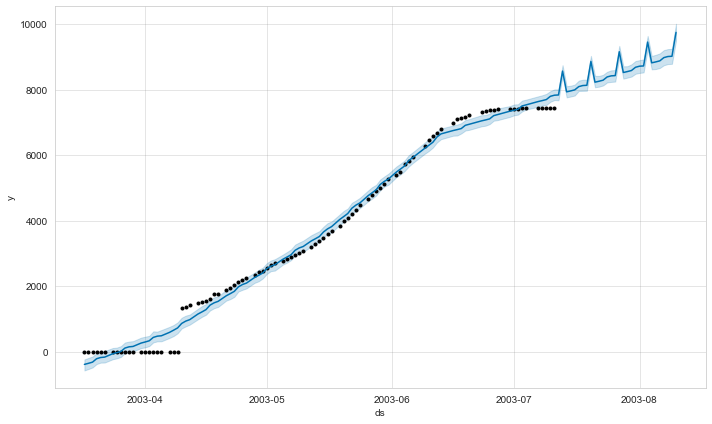

In [ ]:
recovered_forecast_plot = m.plot(forecast)

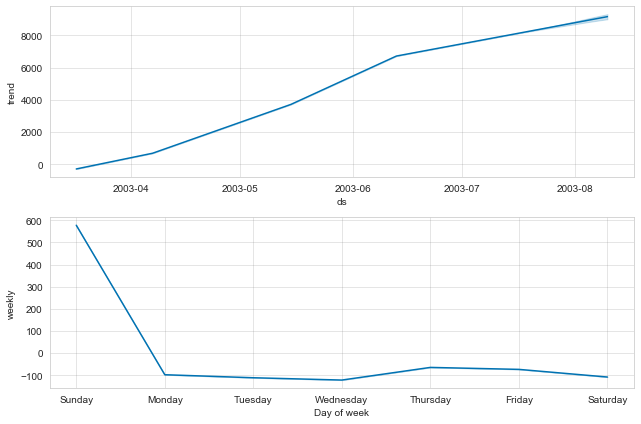

In [ ]:
recovered_forecast_plot = m.plot_components(forecast)

In [ ]:
active.columns = ['ds','y']
active['ds'] = pd.to_datetime(active['ds'])
active.head(10)

,ds,y
0,2003-03-17,163
1,2003-03-18,215
2,2003-03-19,255
3,2003-03-20,296
4,2003-03-21,340
5,2003-03-22,375
6,2003-03-24,439
7,2003-03-25,470
8,2003-03-26,1274
9,2003-03-27,1355


In [ ]:
m = Prophet(interval_width=0.50)
m.fit(active)
future = m.make_future_dataframe(periods=30)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
E:\2020v Anaconda\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



,ds
121,2003-08-06
122,2003-08-07
123,2003-08-08
124,2003-08-09
125,2003-08-10


In [ ]:
#predicting the future with date, and upper and lower limit of y value
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
121,2003-08-06,1143.626399,429.230986,1971.551126
122,2003-08-07,1071.706977,289.618430,1858.316082
123,2003-08-08,1068.440898,311.460744,1834.121982
124,2003-08-09,1518.919615,759.746808,2316.478268
125,2003-08-10,-2689.175922,-3464.099224,-1967.794696


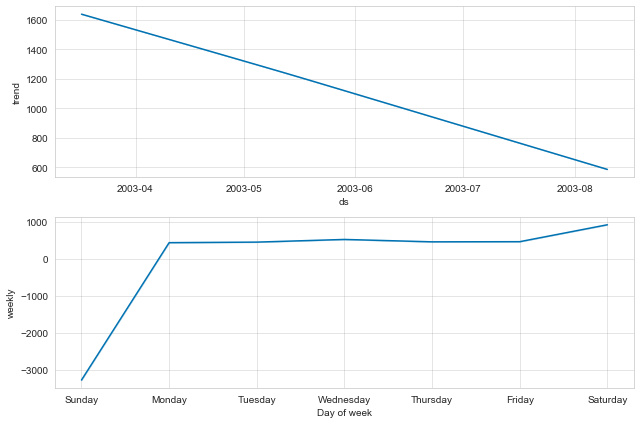

In [ ]:
active_forecast_plot = m.plot_components(forecast)